In [12]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scienceplots
plt.style.use(['science','nature','no-latex','vibrant'])

#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot

In [23]:
# Novec 7000 properties
name = 7000
M = 200 # g/mol
boiling_point = 273+34 # K at 1 atm 
T = np.linspace(-20,100,1000)+273
Vapor_pressure = np.exp(-3548.6/T+22.978) # pa 
critical_pressure = 2.48e6
rho = 1400 # kg/m3
latent_heat = 142 # kJ/kg (heat to convert liquid to gas at boiling point)

c = 1300 # specific heat [j/(kg K)]
k = 0.075 # Thermal conductivity [w/(m*K)]



In [14]:
# #Novec 7100
# name=7100

# # Novec 7000 properties
# M = 250 # g/mol
# boiling_point = 273+61 # K at 1 atm 
# T = np.linspace(-120,100,1000)+273
# #Vapor_pressure = 27e3 # pa 
# critical_pressure = 2.48e6
# rho = 1520 # kg/m3
# latent_heat = 152 # kJ/kg (heat to convert liquid to gas at boiling point)

# c = 1300 # specific heat [j/(kg K)]
# k = 0.075 # Thermal conductivity [w/(m*K)]


In [24]:
V = 0.2e-3
R = 8.314

In [30]:
m_plot = [1,2,3]
n_plot = np.divide(m_plot,M)

P_mass= []

for i in range(len(n_plot)):
    pressure = n_plot[i]*R*T/V
    P_mass.append(pressure)

#n_plot

In [31]:
n_plot

array([0.005, 0.01 , 0.015])

Text(0.5, 1.0, 'Maximum pressure as function of the mass Novec 7000, with V = 0.25L')

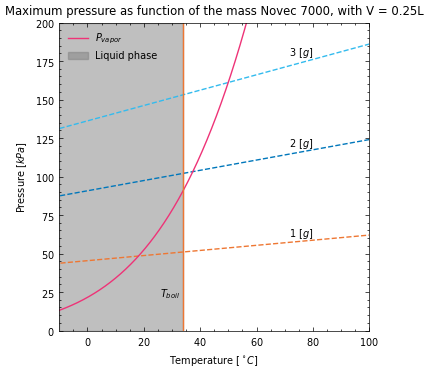

In [33]:
plt.figure(figsize=(4,4))
x_label_pos = 80 
for ii in range(len(P_mass)):
    idx = (np.abs(T - (x_label_pos + 273))).argmin()
    y_label_pos = P_mass[ii][idx] / 1000 

    plt.plot(T-273,P_mass[ii]/1000,linestyle='--')
    plt.text(x_label_pos, y_label_pos, str(m_plot[ii])+ ' [$g$]', verticalalignment='bottom', horizontalalignment='right')

plt.plot(T-273,Vapor_pressure/1000,label='$P_{vapor}$')
#plt.axhline(Vapor_pressure/1000,label="$P_{vapor}$",color = 'red')
plt.axvline(boiling_point-273)
plt.text(boiling_point-273-1, 20, '$T_{boil}$', verticalalignment='bottom', horizontalalignment='right')

plt.axvspan(-10,boiling_point-273,color='grey',alpha=0.5,label='Liquid phase')


plt.xlim(-10,100)
plt.ylim(0,200)
plt.legend()
plt.ylabel('Pressure [$kPa$]')
plt.xlabel('Temperature [$^\circ C$]')
plt.title(f'Maximum pressure as function of the mass Novec {name}, with V = {V*1000}L')


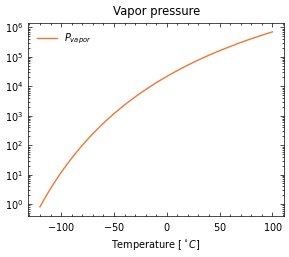

In [18]:
plt.title('Vapor pressure')
plt.semilogy(T-273,Vapor_pressure,label='$P_{vapor}$')
plt.xlabel('Vapor pressure [$pa$]')

plt.xlabel('Temperature [$^\circ C$]')
plt.legend()

In [19]:
V = 1.5e-3
P = np.linspace(0.1,1,100)*1e5
P_amb = 1e5
T = 303 # K
R = 8.314


n = (P+P_amb)*V/(R*T)
m = n*M
V_liquid = m*rho/1000
#print('Mass needed to reach', P/1000, '[kPa] is', m, '[g]')

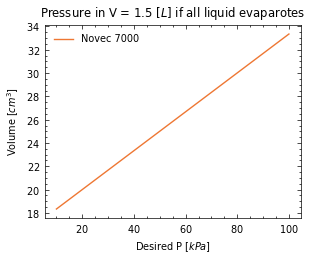

In [20]:
plt.plot(P/1000,V_liquid,label='Novec 7000')
plt.title(f"Pressure in V = {V*1000} [$L$] if all liquid evaparotes")
plt.xlabel('Desired P [$kPa$]')
plt.ylabel('Volume [$cm^3$]')
plt.legend()

C:\Users\vaarkamp\AppData\Local\Temp\ipykernel_17364\2107896212.py:7: RuntimeWarning: divide by zero encountered in divide
  V  = w**3*((h/(np.pi*w)-0.142*(1-10**(-h/w))))
C:\Users\vaarkamp\AppData\Local\Temp\ipykernel_17364\2107896212.py:7: RuntimeWarning: invalid value encountered in multiply
  V  = w**3*((h/(np.pi*w)-0.142*(1-10**(-h/w))))


Text(0.5, 0, 'Width [$mm$]')

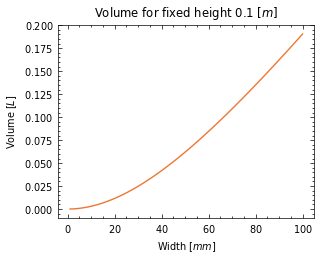

In [21]:
## Teabag problem 
# https://en.wikipedia.org/wiki/Paper_bag_problem

w = np.linspace(0,100,100)*1e-3
h = 0.1 # m

V  = w**3*((h/(np.pi*w)-0.142*(1-10**(-h/w))))

plt.plot(w*1000,V*1000)
plt.title(f'Volume for fixed height {h} [$m$]')
plt.ylabel('Volume [$L$]')
plt.xlabel('Width [$mm$]')

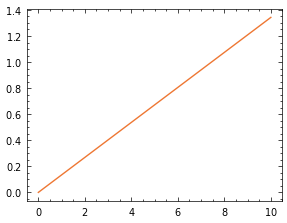

In [44]:
m = np.linspace(0,10,100)
n = m/M
P_amb = 1e5
T_oven = 50+273
V= n*R*T_oven/P_amb

plt.plot(m,V*1000)